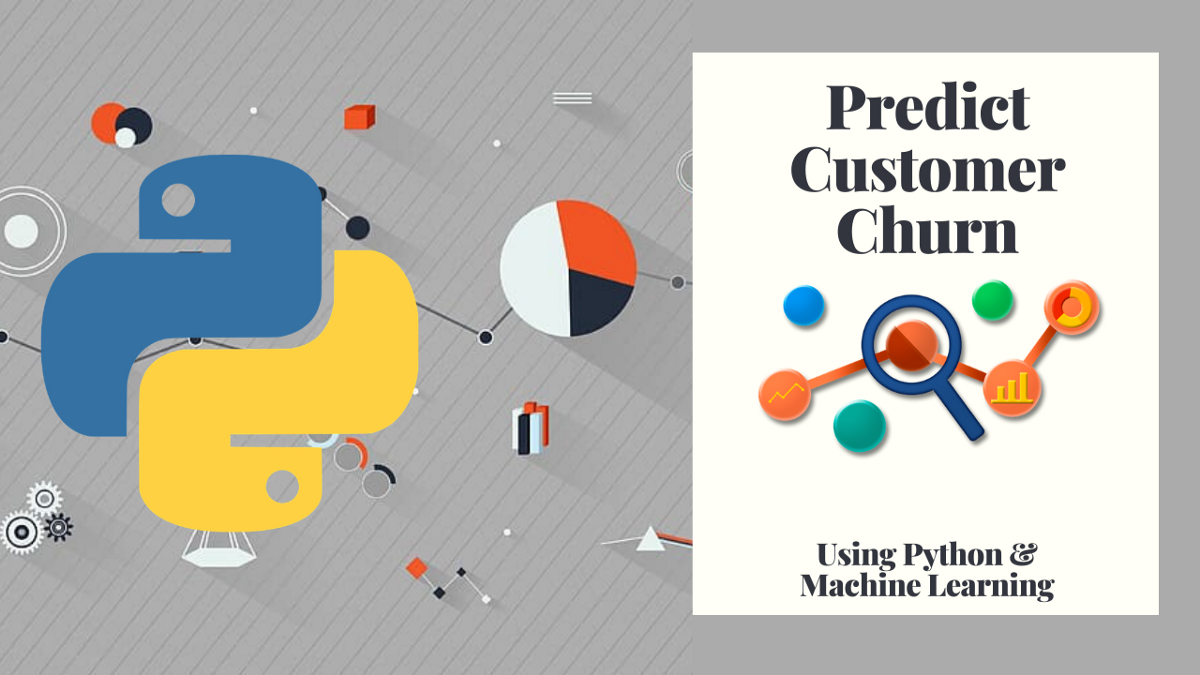

# Aim: Building and comparing several customer churn prediction models. 

## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# impoting all the required library
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [2]:
data= pd.read_csv("Telecom_customer_churn.csv")

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4770,7762-ONLJY,Female,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,94.45,No
5400,4067-HLYQI,Female,0,No,No,33,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.40,2406.1,No
4614,4732-RRJZC,Male,0,Yes,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,144.35,No
3821,1833-VGRUM,Female,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.20,74.2,Yes
2769,5577-OTWWW,Female,0,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.75,297.3,Yes
4148,9142-XMYJH,Female,0,No,No,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.35,601.6,No
5332,4565-EVZMJ,Female,0,No,No,47,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,58.90,2813.05,No
845,0422-OHQHQ,Female,0,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.55,295.95,No
6171,1658-XUHBX,Female,1,Yes,Yes,59,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),88.75,5348.65,No
1629,3533-UVMOM,Male,0,Yes,No,68,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,No,Bank transfer (automatic),70.95,4741.45,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Data Description

1. Data is having 7043 entries, 0 to 7042  
2. Data having 21 columns and 7043 Rows   
3. All the columns are having 7043 Non-Null value, means data is not having any null values.  
4. Out of 21 columns we have 1 float, 2 int64 and 18 Object type values.  
5. memory usage: 1.1+ MB  
6. Here we can see Totalcharges is object type, but the values are float. It might be possible we have space in isnsted of value we will check where  data having space or not.

### Attribute Information:

customerID          :   Unique Id of Customer , object   
gender              :   Gender of the customer, object   
SeniorCitizen       :   Where customer is a SeniorCitizen or not, int    
Partner             :   Where customer having Partner or not object   
Dependents          :   Where customer having Dependents   
tenure              :   Number of months the customer has stayed with the company  
PhoneService        :   Whether the customer has a phone service or not (Yes, No)   
MultipleLines       :   Whether the customer has multiple lines or not (Yes, No, No phone service)   
InternetService     :   Customer’s internet service provider (DSL, Fiber optic, No)   
OnlineSecurity      :   Whether the customer has online security or not (Yes, No, No internet service)   
OnlineBackup        :   Whether the customer has online backup or not (Yes, No, No internet service)   
DeviceProtection    :   Whether the customer has device protection or not (Yes, No, No internet service)   
TechSupport         :   Whether the customer has tech support or not (Yes, No, No internet service)   
StreamingTV         :   Whether the customer has streaming TV or not (Yes, No, No internet service)   
StreamingMovies     :   Whether the customer has streaming movies or not (Yes, No, No internet service)    
Contract            :   The contract term of the customer (Month-to-month, One year, Two year)   
PaperlessBilling    :   Whether the customer has paperless billing or not (Yes, No)   
PaymentMethod       :   The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  

MonthlyCharges      :   The amount charged to the customer monthly  
TotalCharges        :   The total amount charged to the customer 

#### Taget Column: Churn               :   Whether the customer churned or not (Yes or No)   

#### Checking null values

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Luclkiy we are not having any Null values

In [8]:
data.duplicated().sum()

0

We also not having any duplicated value in the data.

#### Checkign any space values filled   in the columns

In [9]:
data.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Data is gaving 11 value which are filled with space character. 

In [10]:
data.replace(to_replace=" ", value=np.nan, inplace= True)

In [11]:
data =data.dropna()

In [12]:
data.drop('customerID', axis=1, inplace= True)

In [13]:
data['TotalCharges']=data.TotalCharges.astype(float)

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Tenure:  
Mean: 32.421786   
Std : 24.545260  
min : 1.000000   
max : 72.000000   

MonthlyCharges      
Mean: 64.798208     
Std : 30.085974    
min : 18.250000    
max : 118.750000  

TotalCharges    
Mean: 2283.300441      
Std : 2266.771362    
min : 18.800000     
max : 8684.800000   


In [15]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


Here we can see a strong correlation of tenure, monthlycharges with TotalCharges.

## Data analysis and Visualization

##### Univariate Analysis

Here We will analyse the distribution of our data columns.  
before analysing lets divide dataset in categorical and numerical columns.  

In [16]:
cat_feature= data.select_dtypes(include=[np.object])

Lets first analyse the churn percentage, we will analyse this using pi chart. 

Text(0.5, 1.0, 'Percentage of Customer Churn ')

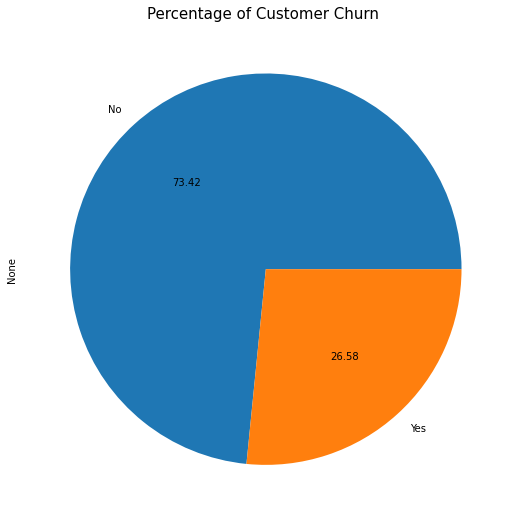

In [17]:
plt.figure(figsize=(15,9))
cat_feature.groupby('Churn').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage of Customer Churn ", fontsize =15)

Here we can see 26.58 percentage of Customer are not satisfied with the company and dont wanted to contineu with company.

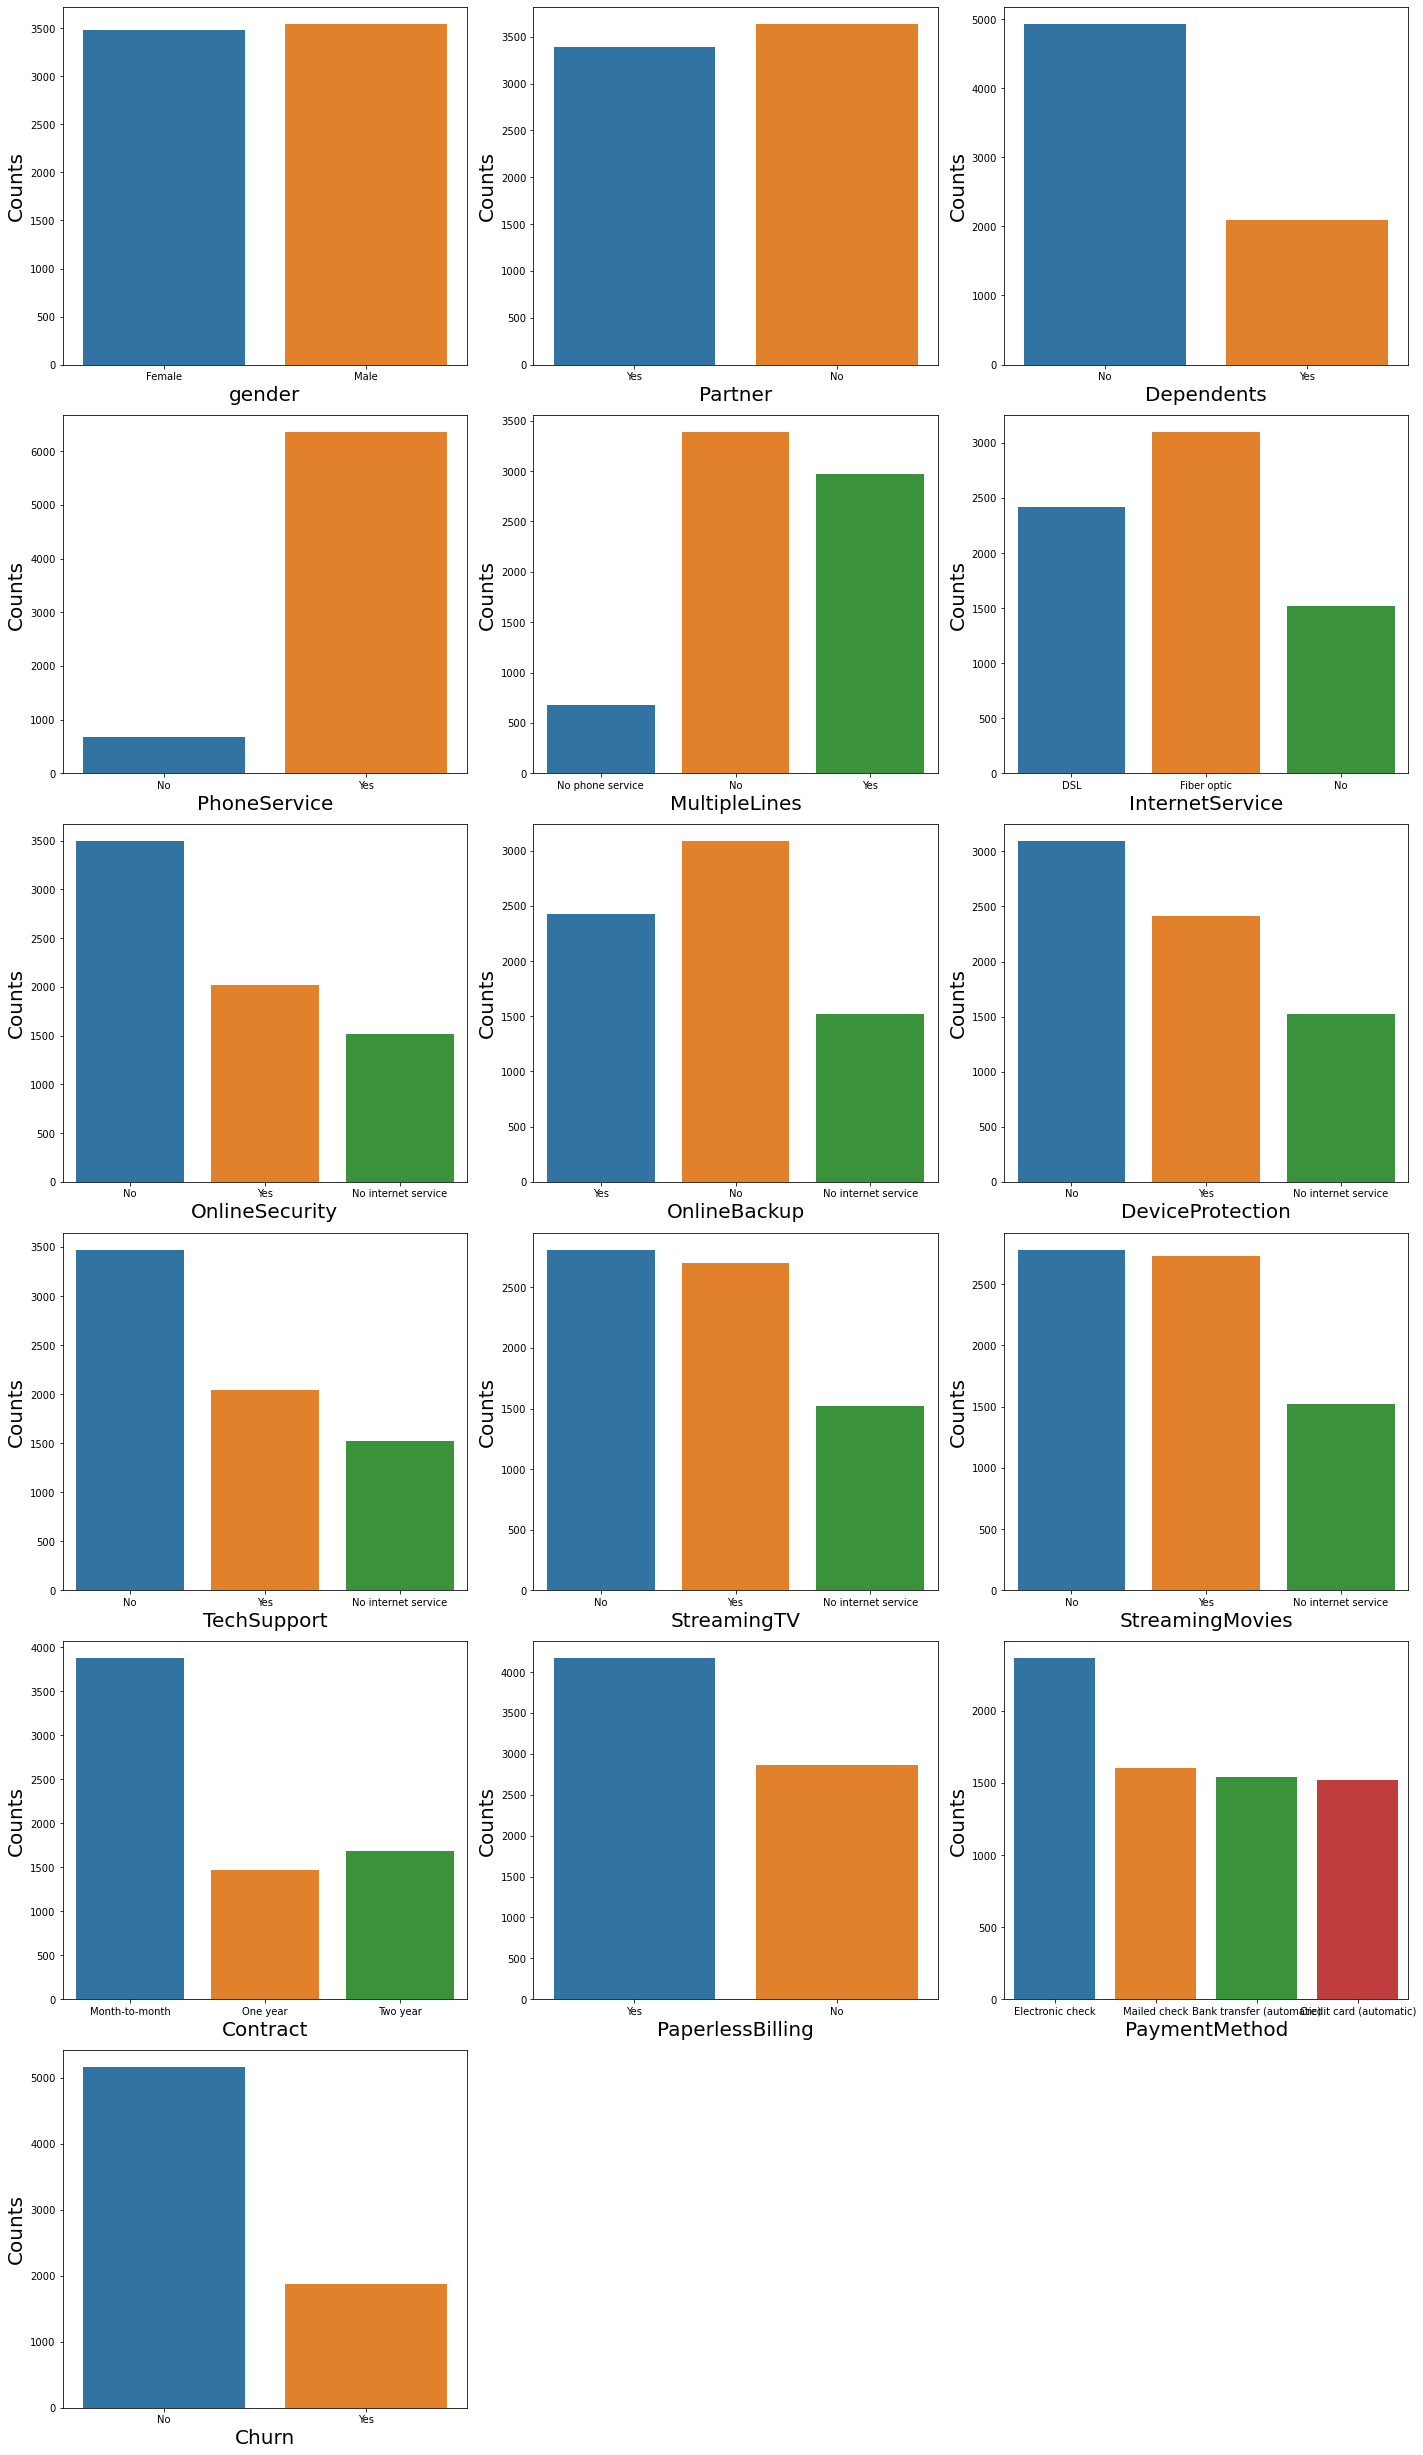

In [18]:
plt.figure(figsize=(20,45))
plotnumber= 1

for column in cat_feature:
    if plotnumber<=17:
        ax= plt.subplot(8,3, plotnumber)
        sns.countplot(cat_feature[column])
        
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Counts', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

1. Gender : No of males and females are almost equal  
2. Partner: Count for having partner is less as compare to without partner   
3. Dependents : Near about 70 percent customers are not having any Dependent     
4. PhoneService : More than 90 percent customers have PhoneService  
5. MultipleLines : More than 48 percent customer not having multiple lines  
6. InternetService : For More than 44 percent customers internet service provider is Fiber Optics  
7. OnlineSecurity: 49 percent customers are not having Online Security  
8. OnlineBackup:  More than 43 customers Not having online backup   
9. DeviceProtection : More than 43 customers are not having Device Protection   
10. TechSupport: 49 percent customers are not having any technical support  
11. StreamingTV : The count for Streaming TV and Not Streaming TV are almost same   
12. StreamingMovies : The count for Streaming Movies and Not Streaming Movies are almost same  
13. Contract : More than 55 percent of the cutmores are having month-to-month contract  
14. PaperlessBilling : we can see more than 59 percent of the customers are using PaperlessBilling  
15. PaperlessBilling : Most of the customers are  using Electronic check   
16. Churn : 26 percent customer out 100 are churned.  

In [19]:
num_feature= data.select_dtypes(include=[np.number])

Text(0.5, 1.0, 'Percentage SeniorCitizen')

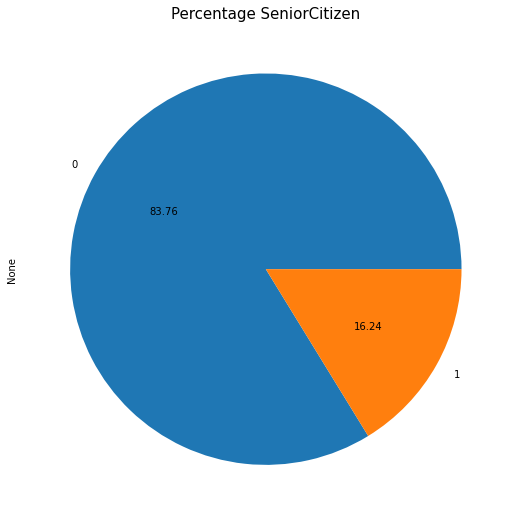

In [20]:
plt.figure(figsize=(15,9))
num_feature.groupby('SeniorCitizen').size().plot(kind='pie', autopct='%.2f')
plt.title("Percentage SeniorCitizen", fontsize =15)

83.76 percent of customers are not senior Citizen  

Text(0.5, 1.0, 'tenure')

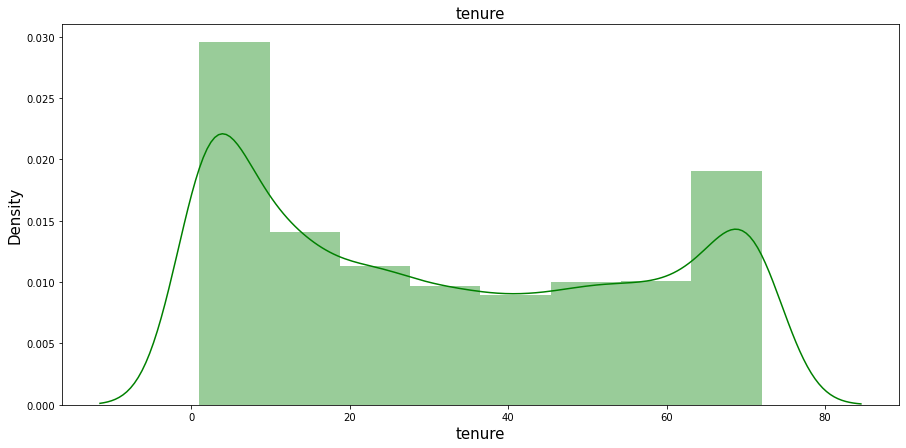

In [21]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['tenure'], bins= 8, color='g')
plt.xlabel('tenure', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('tenure', fontsize=15)

Here we can see the probablity to have tenure 0-10  and more than 60 is more.  

Text(0.5, 1.0, 'MonthlyCharges')

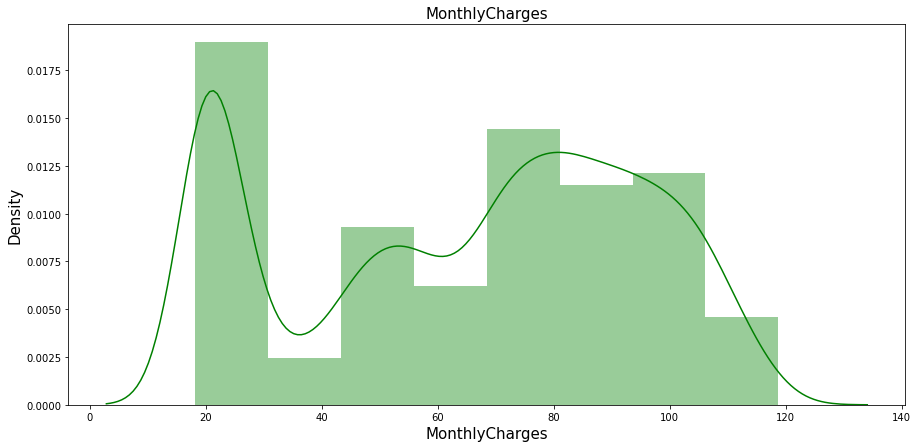

In [22]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['MonthlyCharges'], bins= 8, color='g')
plt.xlabel('MonthlyCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('MonthlyCharges', fontsize=15)

Chance of customers having monthly cahrge in the range of 70 to 100, is more as compare to other charges. 

Text(0.5, 1.0, 'TotalCharges')

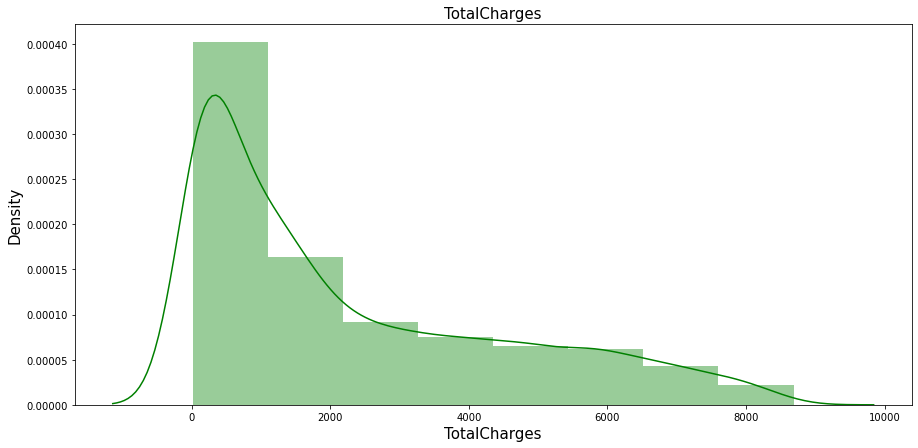

In [23]:
plt.figure(figsize=(15,7))
sns.distplot(num_feature['TotalCharges'], bins= 8, color='g')
plt.xlabel('TotalCharges', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('TotalCharges', fontsize=15)

Here we can see skewness present in the Total charge column, customers in the range 0 to 2000 are more.  

#### Bivariate analysis

Here we analyse our feature columns with respect to churn which our target variable. 

In [24]:
for col in cat_feature:
    print('\n%s column: '%col)
    print(cat_feature[col].value_counts(),'\n'),
    print('='*30)


gender column: 
Male      3549
Female    3483
Name: gender, dtype: int64 


Partner column: 
No     3639
Yes    3393
Name: Partner, dtype: int64 


Dependents column: 
No     4933
Yes    2099
Name: Dependents, dtype: int64 


PhoneService column: 
Yes    6352
No      680
Name: PhoneService, dtype: int64 


MultipleLines column: 
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 


InternetService column: 
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 


OnlineSecurity column: 
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 


OnlineBackup column: 
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 


DeviceProtection column: 
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int

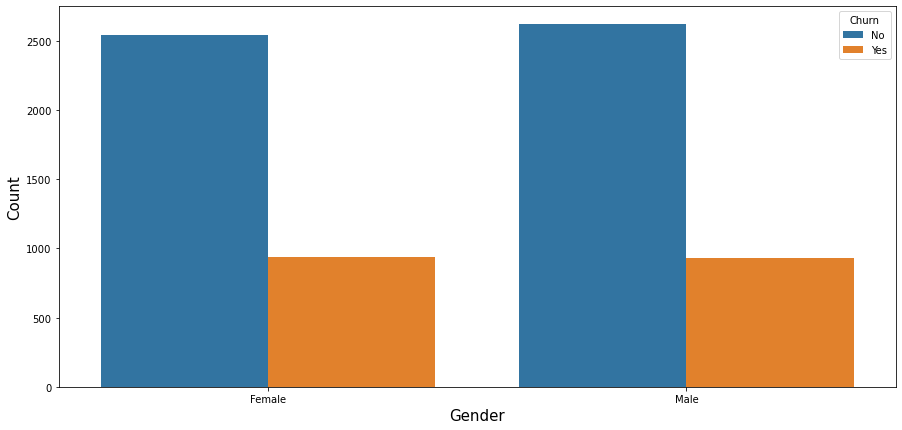

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(data['gender'], hue='Churn', data= data)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Male and female both are equalily having chance of churn. 

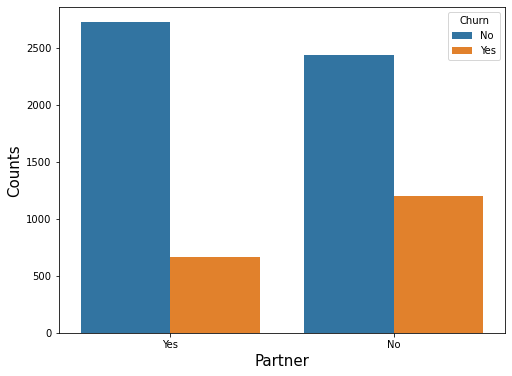

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', data= cat_feature, hue='Churn')
plt.xlabel('Partner', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Here we can see the customers not having partners are more likely to churn. 

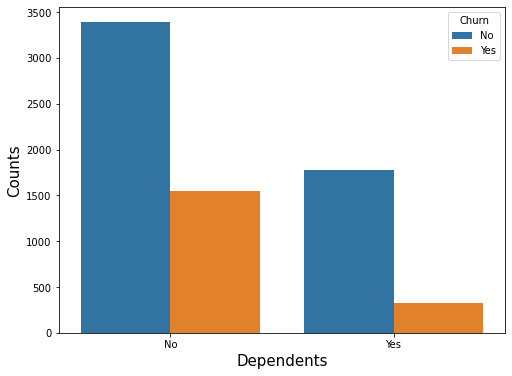

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data= cat_feature, hue='Churn')
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Churn for customers not having any dependent is more as compare to customers having dependent. 

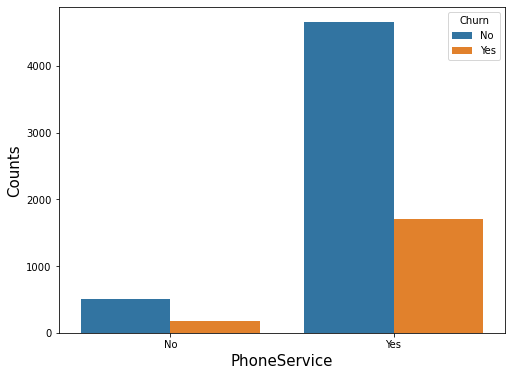

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', data= cat_feature, hue='Churn')
plt.xlabel('PhoneService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having phone service are more likely to churn 

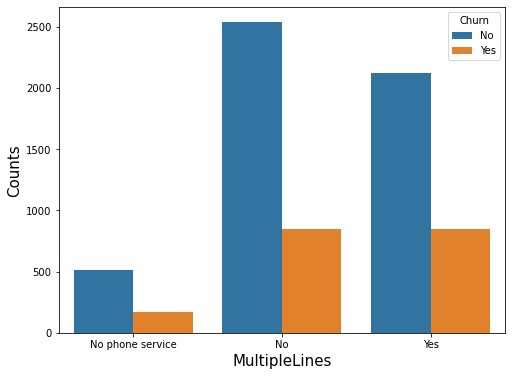

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', data= cat_feature, hue='Churn')
plt.xlabel('MultipleLines', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having multiple lines are more likely to churn.

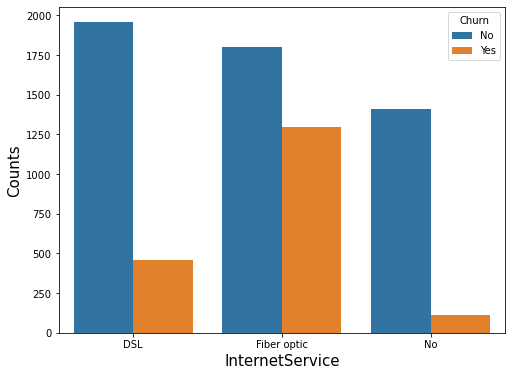

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data= cat_feature, hue='Churn')
plt.xlabel('InternetService', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers option for fiber optics internet service are more likely to churn. 

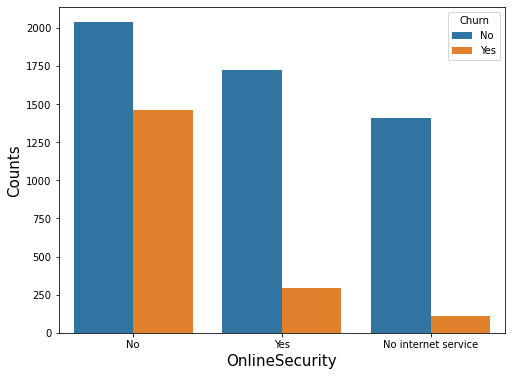

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', data= cat_feature, hue='Churn')
plt.xlabel('OnlineSecurity', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Online security are more likely, to churn.  

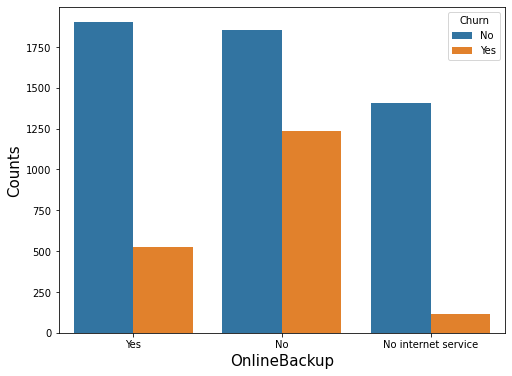

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', data= cat_feature, hue='Churn')
plt.xlabel('OnlineBackup', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having online backup are more likely to churn. 

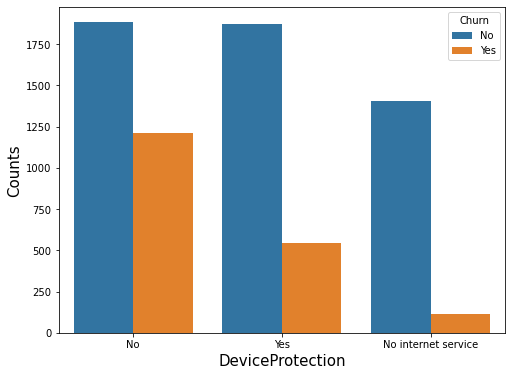

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', data= cat_feature, hue='Churn')
plt.xlabel('DeviceProtection', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Device Protection are more likly to churn. 

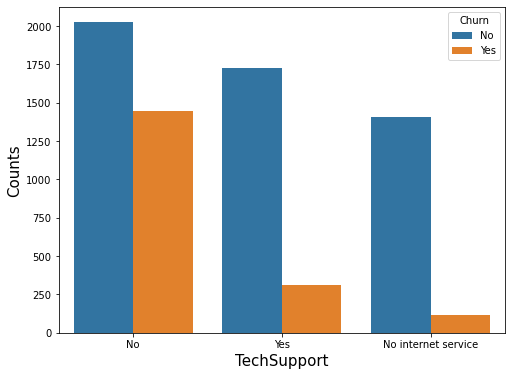

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TechSupport', data= cat_feature, hue='Churn')
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers without any Technical support are more likely to churn

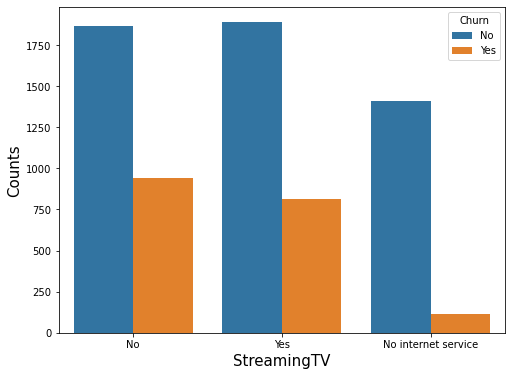

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', data= cat_feature, hue='Churn')
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Streaming TV are more likely to churn. 

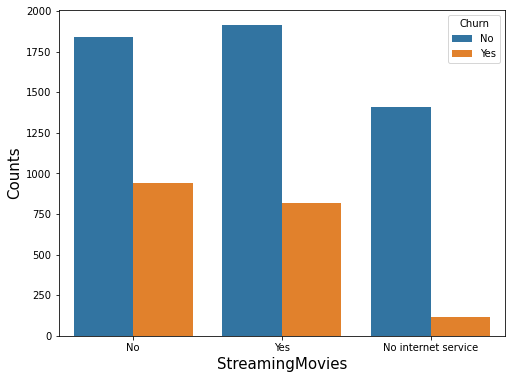

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', data= cat_feature, hue='Churn')
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers not having Streaming Movies are more likely to churn.

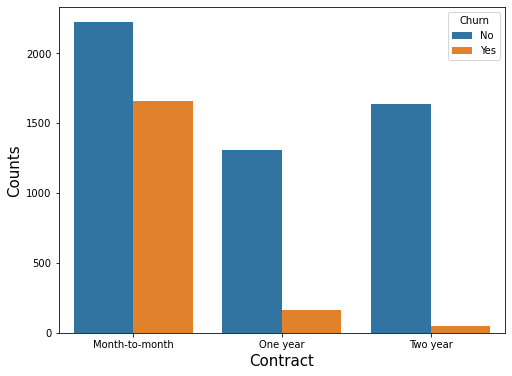

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data= cat_feature, hue='Churn')
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Month to month Contract are more likely to churn. 

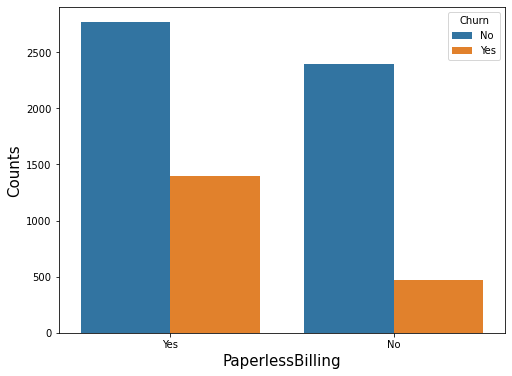

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', data= cat_feature, hue='Churn')
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Paperless Billing are more likely to churn. 

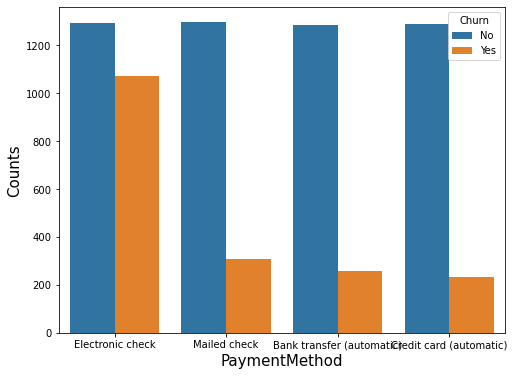

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data= cat_feature, hue='Churn')
plt.xlabel('PaymentMethod', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Customers having Electronucs Payment method are more likely to churn. 

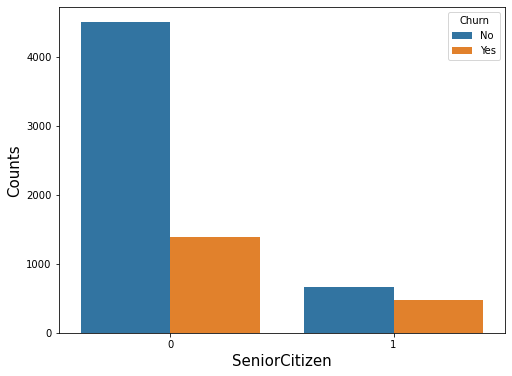

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', data= data, hue='Churn')
plt.xlabel('SeniorCitizen', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

CUstomers who are not Senior Citizen are more likely to churn. 

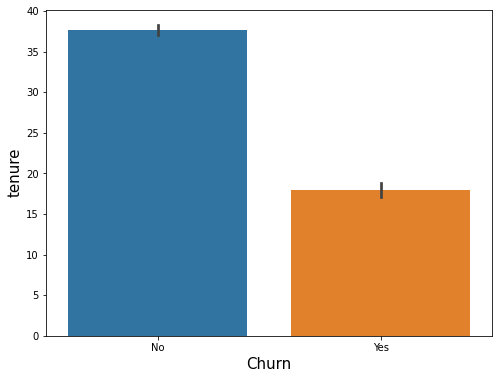

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(y='tenure', x='Churn', data= data)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

Bar Plot indiactes Higher the tenure Chance of churn is less. 

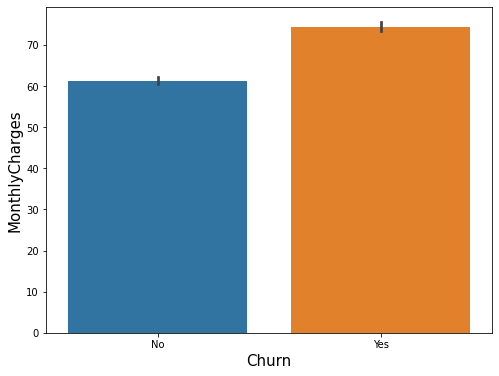

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(y='MonthlyCharges', x='Churn', data= data)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('MonthlyCharges', fontsize=15)
plt.show()

Higher the monthly charges Higher the chance to Churn. 

#### Multivariate Analysis

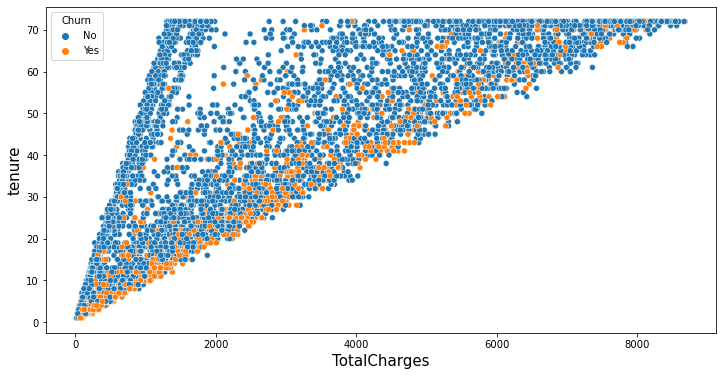

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(data['TotalCharges'], data['tenure'], hue='Churn', data=data)
plt.xlabel('TotalCharges', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

Here we can see as the tenure and toatl charge increase, chance of churn is less.

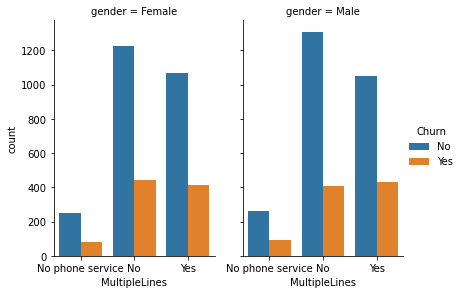

In [44]:
sns.catplot(x="MultipleLines", hue="Churn", col="gender",data=data, kind="count",height=4, aspect=.7)

Churn for male and female are same in Multiline survice.

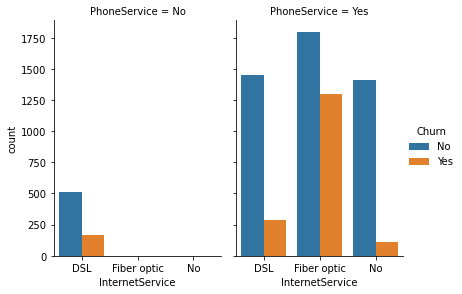

In [45]:
sns.catplot(x="InternetService", hue="Churn", col="PhoneService",data=data, kind="count",height=4, aspect=.7)

Here we can see pepole using phine service also use internet service,  
And Customer with Fiber Optics Internet Service are more likely to Churn. 

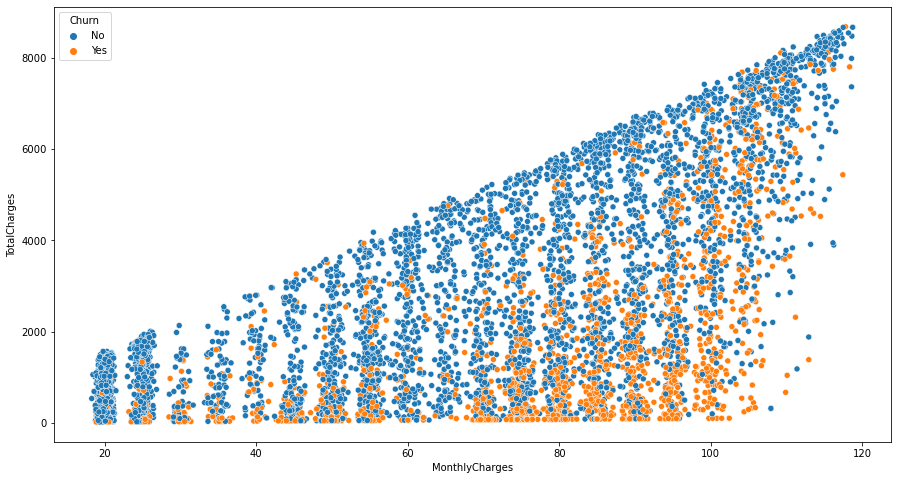

In [46]:
plt.figure(figsize= (15,8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn', data=data);

Here we can see with increase in monthly charge and at low values of total charges churn is more likely to happen.

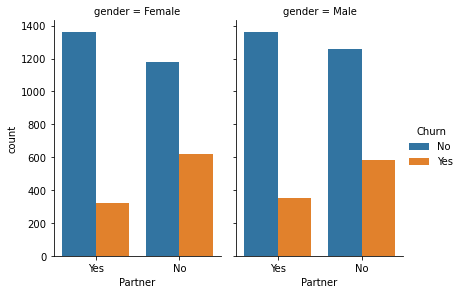

In [47]:
sns.catplot(x="Partner", hue="Churn", col="gender",data=data, kind="count",height=4, aspect=.7)

Here we can say Male and female customers having no partner are more likely to churm. 

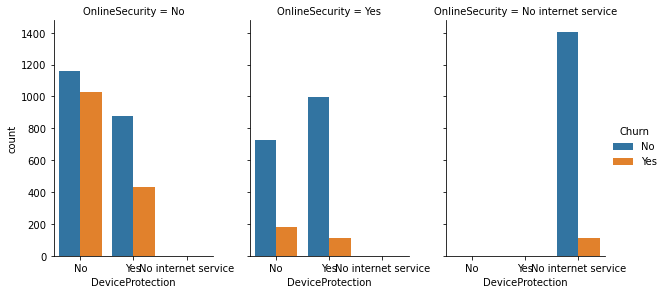

In [48]:
sns.catplot(x="DeviceProtection", hue="Churn", col="OnlineSecurity",data=data, kind="count",height=4, aspect=.7)

Here we can see Customers not having Online security and device protection , are more likely to churn.  

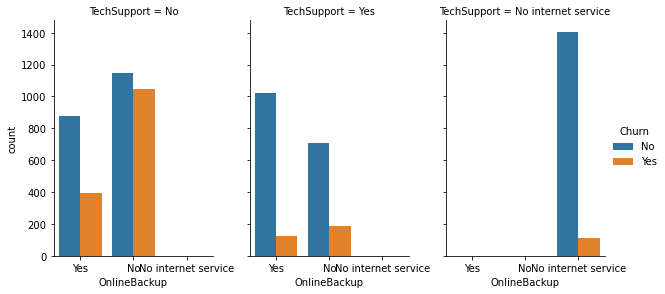

In [49]:
sns.catplot(x="OnlineBackup", hue="Churn", col="TechSupport", data=data, kind="count",height=4, aspect=.7)

Here we can see customers with no online backup and without any technical support are more likly to churn. 

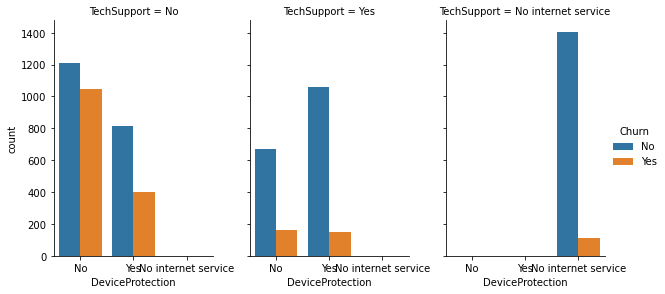

In [50]:
sns.catplot(x="DeviceProtection", hue="Churn", col="TechSupport", data=data, kind="count",height=4, aspect=.7)

Customers without any device Protection and Techsupport are more likely to churn.  
Pepole with device protection and witout tech support are also more likely to churn.  

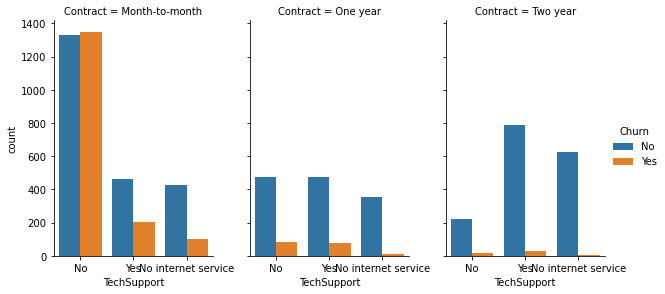

In [51]:
sns.catplot(x="TechSupport", hue="Churn", col="Contract", data=data, kind="count",height=4, aspect=.7)

Here we can see customers with monthly contract and without any technical support are more likely to Churn.  
we can also say that for month  to month contract, technical support is less.  
Due to less technical support Customers are more likely to churn.  

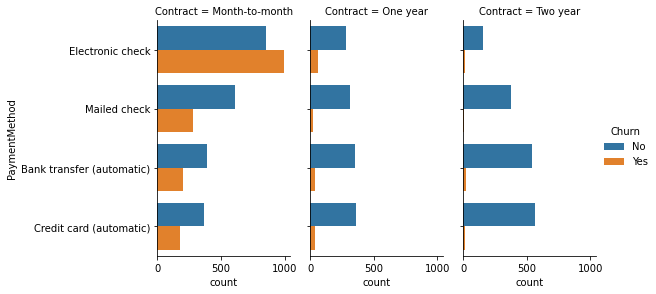

In [52]:
sns.catplot(y="PaymentMethod", hue="Churn", col="Contract", data=data, kind="count",height=4, aspect=.7)


Customers with month to month contract and using Electronics check method for payment are more likely to Churn. 

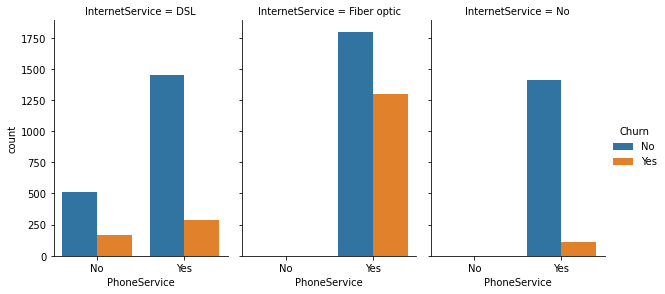

In [53]:
sns.catplot(x="PhoneService", hue="Churn", col="InternetService", data=data, kind="count",height=4, aspect=.7)


Customers with Phone service and Internet as Fiber optics are more likely to churn. 

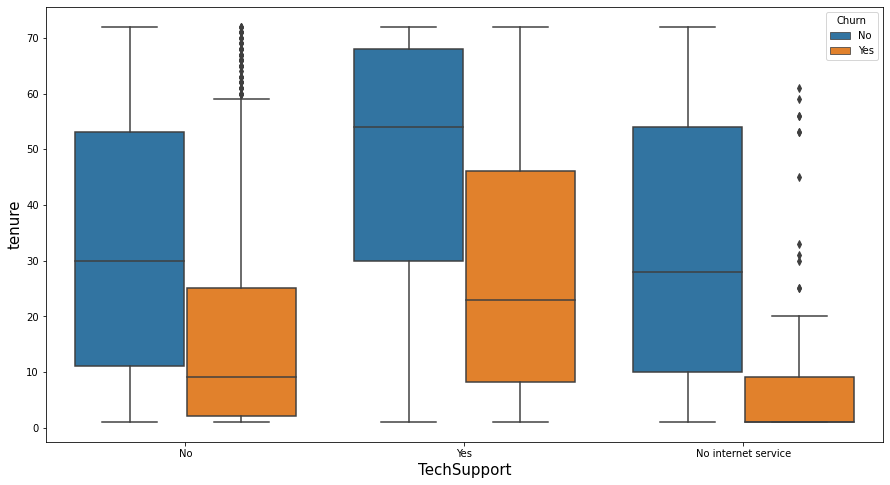

In [54]:
plt.figure(figsize=(15, 8))
sns.boxplot(y='tenure', x='TechSupport',hue='Churn' ,data= data)
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('tenure', fontsize=15)
plt.show()

From Box plot we can see without any tech support the tennure is less and there is high chances of churn at less tenure.  
Customers opted for techsupport are more likely to stay with the company.  

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

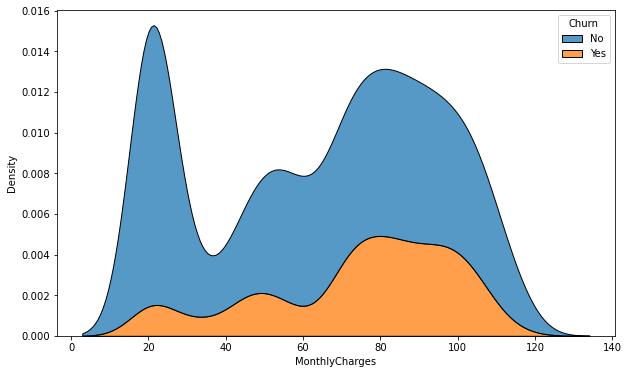

In [55]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="MonthlyCharges", hue="Churn", multiple="stack")

We can see churn is high as the monthly charges increase.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

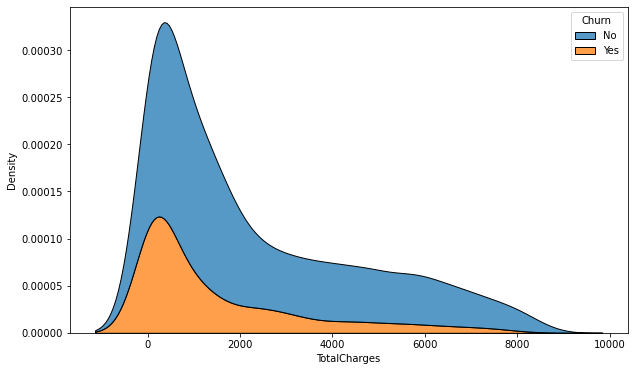

In [56]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = data, x="TotalCharges", hue="Churn", multiple="stack")

Here we can see a reverse of monthly charges, as the Total charge increse the churning decreases. 

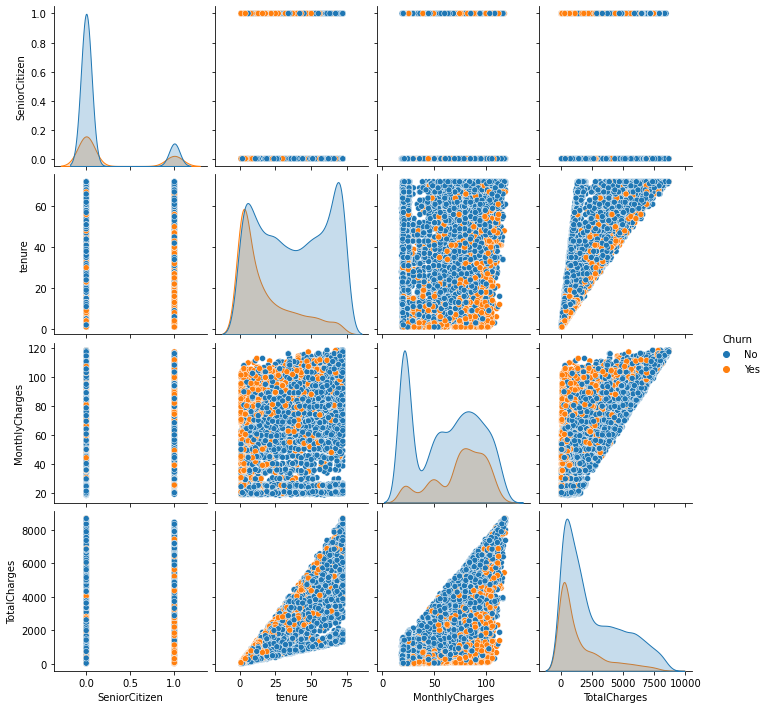

In [57]:
sns.pairplot(data=data, hue='Churn')

From the pair plot we can predict Senior Citizen are more likely to churn 

## Data Preprocessing

In this step we will process our data to make it standard for our model. 

In [58]:
feature=data.drop('Churn', axis=1)
target= data['Churn']

In [59]:
data_new= pd.get_dummies(feature,sparse=False, drop_first=True )

In [60]:
data_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [61]:
data_new.shape

(7032, 30)

After applyign one hot encoder, now our data changes into 7032 rows and 30 columns.  

For Target column lets imort label encoder

In [62]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Target = le.fit_transform(target)

In [63]:
data_new['Churn']= Target

In [64]:
data_new.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


Now curn is added to the new dataframe. 

###### Lets check Correlation

In [65]:
data_new.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,0.254923,-0.182519,-0.182519,-0.038576,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,0.017930,-0.037529,-0.037529,0.328297,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,0.787195,-0.763191,-0.763191,0.296447,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,0.360769,-0.374878,-0.374878,0.412619,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,-0.011189,0.004745,0.004745,-0.016328,0.004745,-0.013093,0.004745,-0.000807,0.004745,-0.008507,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,0.001235,-0.000286,-0.000286,0.143346,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,-0.164101,0.138383,0.138383,0.080786,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.290183,0.171817,0.171817,-0.091676,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.290183,-0.171817,-0.171817,0.091676,-0.171817,0.052133,-0.171817,0.070076,-0.171817,0.095138,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,0.366420,-0.210794,-0.210794,0.098592,-0.210794,0.202228,-0.210794,0.201733,-0.210794,0.100421,-0.210794,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


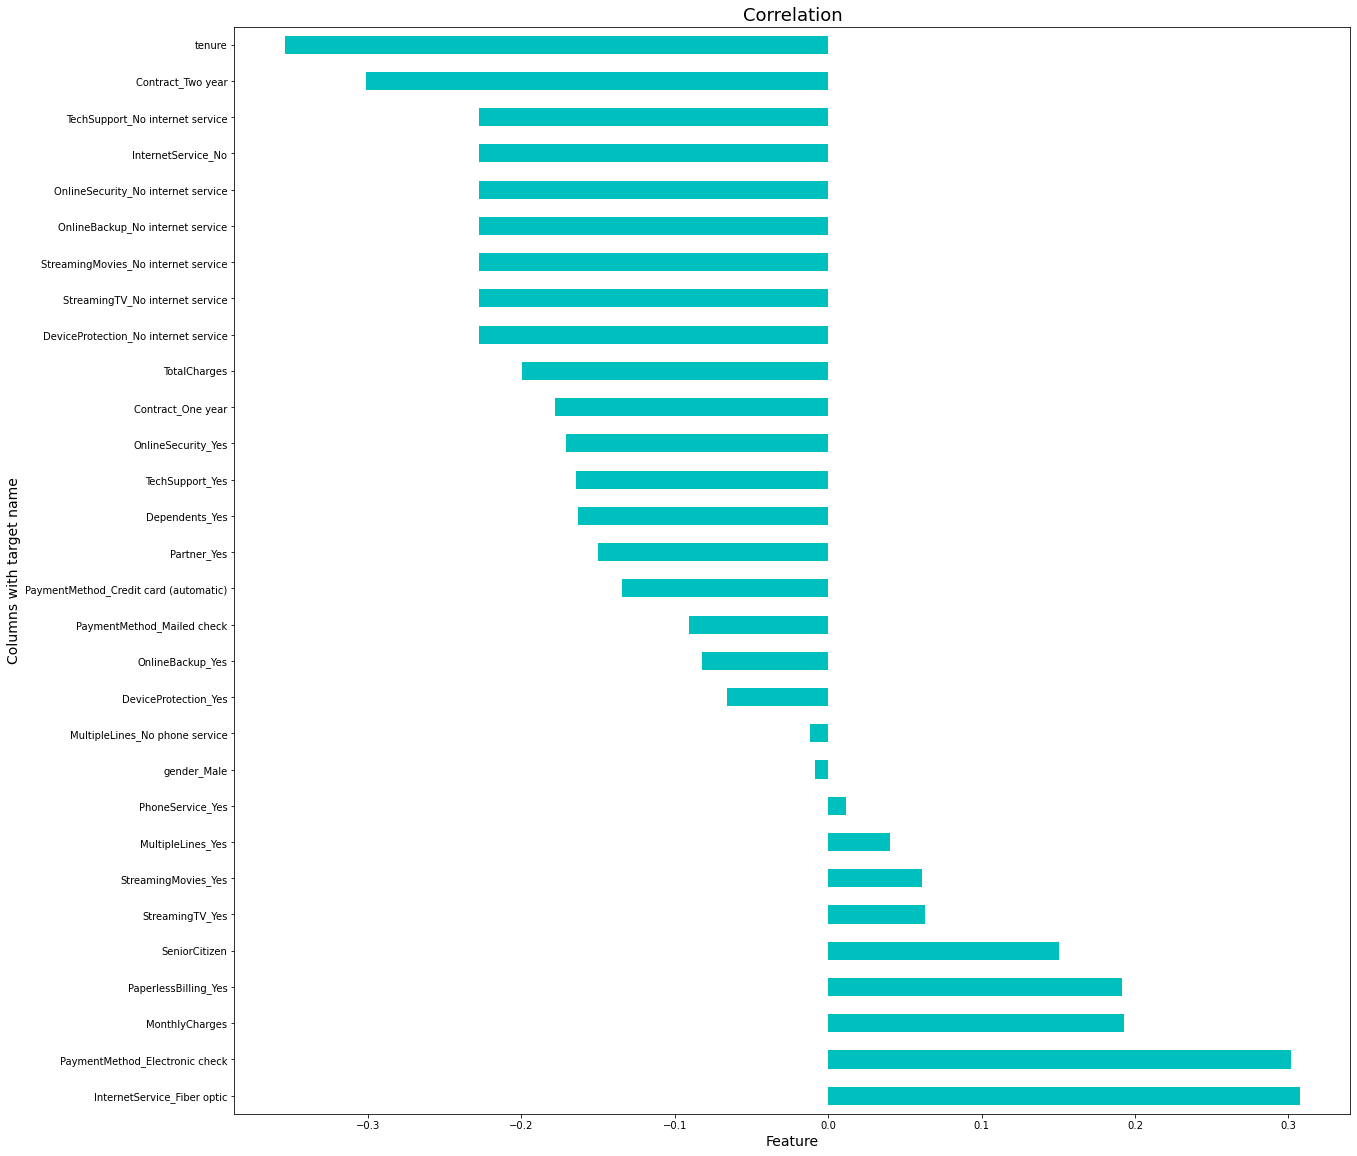

In [66]:
plt.figure(figsize=(20,20))
data_new.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

All the columns on the left of 0.0 are having negative correlation and columns on Right of 0.0 are having positive correlation

## Checking Outliers

<AxesSubplot:>

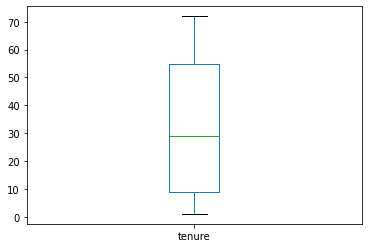

In [67]:
data_new['tenure'].plot.box()

<AxesSubplot:>

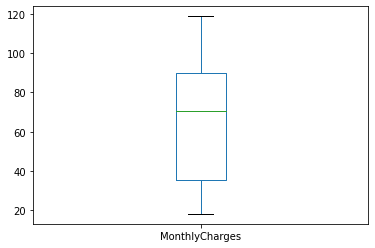

In [68]:
data_new['MonthlyCharges'].plot.box()

<AxesSubplot:>

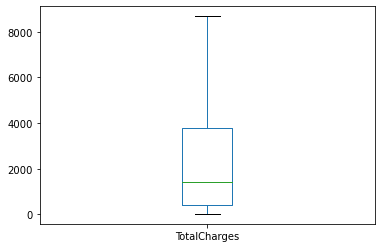

In [69]:
data_new['TotalCharges'].plot.box()

Here we can see our contineous columns not having any outliers. 

### Checking Skewness

Here we will check skewness only for contineous data, not for categorical data.

In [70]:
data.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

SeniorCitizen and TotalCharges are aving skewness

### Removing Skewness from the data

In [71]:
data_new['TotalCharges'] = np.sqrt( data_new['TotalCharges'] )

## Scaling the data Using StandardScaler.

In [72]:
# Dividing into Feature and Target data
x=data_new.drop(['Churn'],axis=1)
y=data_new['Churn']

In [73]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='Churn', ylabel='count'>

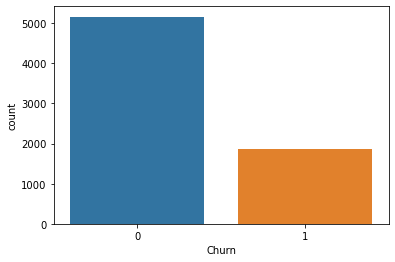

In [74]:
sns.countplot(y)

Here we can see our output is not balanced we will now use SMOTE to balance the output.

from imblearn.over_sampling import SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [77]:
X_train_over.shape

(10326, 30)

In [78]:
Y_train_over.shape

(10326,)

In [79]:
Y_train_over.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [80]:
data_new.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [81]:
dfx=pd.DataFrame(data=X_train_over, columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])

In [82]:
dfx

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-1.448158,-1.009430,1.035617,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.525130,-0.525130,-0.633746,-0.525130,1.378330,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,0.100539,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.525130,-0.525130,1.577918,-0.525130,-0.725516,-0.525130,1.381372,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-1.247016,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.525130,-0.525130,1.577918,-0.525130,1.378330,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,0.077540,0.990658,-0.965608,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.525130,-0.525130,1.577918,-0.525130,-0.725516,-0.525130,1.381372,-0.525130,1.564308,-0.525130,-0.790186,-0.525130,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-1.168976,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,1.127527,-0.525130,-0.525130,-0.633746,-0.525130,-0.725516,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.440327,-1.258421,-1.474718,-1.466864,-1.009430,1.035617,1.533025,0.327189,-0.327189,-0.854336,-0.886896,1.904289,1.904289,-0.633746,1.904289,-0.725516,1.904289,-0.723918,1.904289,-0.639260,1.904289,-0.790186,1.904289,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
10322,-0.440327,1.347389,1.361366,1.714691,0.990658,-0.965608,-0.652305,0.327189,-0.327189,1.170500,1.127527,-0.525130,-0.525130,0.290932,-0.525130,1.378330,-0.525130,0.501168,-0.525130,1.564308,-0.525130,0.406050,-0.525130,1.254943,1.943495,-0.561364,-1.206361,-0.525351,1.404764,-0.543604
10323,-0.440327,-1.179131,0.336394,-1.014238,0.472413,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,-0.886896,-0.525130,-0.525130,-0.633746,-0.525130,-0.725516,-0.525130,1.381372,-0.525130,1.564308,-0.525130,1.265525,-0.525130,1.254943,-0.514537,-0.561364,0.301570,-0.525351,1.404764,-0.543604
10324,-0.440327,-1.042518,-0.873716,-0.990957,-0.678889,-0.965608,-0.652305,-3.056334,3.056334,-0.854336,-0.886896,-0.525130,-0.525130,-0.633746,-0.525130,1.378330,-0.525130,-0.723918,-0.525130,-0.639260,-0.525130,-0.790186,-0.525130,0.915857,-0.514537,-0.561364,0.828939,1.903490,-0.711863,-0.543604


### VIF Calculation

In [83]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [85]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.710463
2,MonthlyCharges,908.545548
3,TotalCharges,23.929081
4,gender_Male,1.004765
5,Partner_Yes,1.519534
6,Dependents_Yes,1.438101
7,PhoneService_Yes,inf
8,MultipleLines_No phone service,inf
9,MultipleLines_Yes,8.106498


In [86]:
dfx.drop(['PhoneService_Yes'],axis=1, inplace= True)

In [87]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.710463
2,MonthlyCharges,908.545548
3,TotalCharges,23.929081
4,gender_Male,1.004765
5,Partner_Yes,1.519534
6,Dependents_Yes,1.438101
7,MultipleLines_No phone service,37.510967
8,MultipleLines_Yes,8.106498
9,InternetService_Fiber optic,173.733549


In [88]:
dfx.drop(['InternetService_No'],axis=1, inplace= True)

In [89]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.710463
2,MonthlyCharges,908.545548
3,TotalCharges,23.929081
4,gender_Male,1.004765
5,Partner_Yes,1.519534
6,Dependents_Yes,1.438101
7,MultipleLines_No phone service,37.510967
8,MultipleLines_Yes,8.106498
9,InternetService_Fiber optic,173.733549


In [90]:
dfx.drop(['OnlineSecurity_No internet service'],axis=1, inplace= True)

In [91]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.710463
2,MonthlyCharges,908.545548
3,TotalCharges,23.929081
4,gender_Male,1.004765
5,Partner_Yes,1.519534
6,Dependents_Yes,1.438101
7,MultipleLines_No phone service,37.510967
8,MultipleLines_Yes,8.106498
9,InternetService_Fiber optic,173.733549


In [92]:
dfx.drop(['OnlineBackup_No internet service'],axis=1, inplace= True)

In [93]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.710463
2,MonthlyCharges,908.545548
3,TotalCharges,23.929081
4,gender_Male,1.004765
5,Partner_Yes,1.519534
6,Dependents_Yes,1.438101
7,MultipleLines_No phone service,37.510967
8,MultipleLines_Yes,8.106498
9,InternetService_Fiber optic,173.733549


In [94]:
dfx.drop(['DeviceProtection_No internet service'],axis=1, inplace= True)

In [95]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.710463
2,MonthlyCharges,908.545548
3,TotalCharges,23.929081
4,gender_Male,1.004765
5,Partner_Yes,1.519534
6,Dependents_Yes,1.438101
7,MultipleLines_No phone service,37.510967
8,MultipleLines_Yes,8.106498
9,InternetService_Fiber optic,173.733549


In [96]:
dfx.drop(['TechSupport_No internet service'],axis=1, inplace= True)

In [97]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.710463
2,MonthlyCharges,908.545548
3,TotalCharges,23.929081
4,gender_Male,1.004765
5,Partner_Yes,1.519534
6,Dependents_Yes,1.438101
7,MultipleLines_No phone service,37.510967
8,MultipleLines_Yes,8.106498
9,InternetService_Fiber optic,173.733549


In [99]:
dfx.drop(['StreamingTV_No internet service'],axis=1, inplace= True)

In [100]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.710463
2,MonthlyCharges,908.545548
3,TotalCharges,23.929081
4,gender_Male,1.004765
5,Partner_Yes,1.519534
6,Dependents_Yes,1.438101
7,MultipleLines_No phone service,37.510967
8,MultipleLines_Yes,8.106498
9,InternetService_Fiber optic,173.733549


In [101]:
dfx.drop(['MonthlyCharges'],axis=1, inplace= True)

In [102]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162569
1,tenure,18.687309
2,TotalCharges,23.889838
3,gender_Male,1.004639
4,Partner_Yes,1.518665
5,Dependents_Yes,1.437979
6,MultipleLines_No phone service,1.497298
7,MultipleLines_Yes,1.530404
8,InternetService_Fiber optic,2.661171
9,OnlineSecurity_Yes,1.464074


In [103]:
dfx.drop(['TotalCharges'],axis=1, inplace= True)

In [104]:
calc_vif(dfx)

,variables,VIF FACTOR
0,SeniorCitizen,1.162216
1,tenure,3.145089
2,gender_Male,1.004362
3,Partner_Yes,1.516084
4,Dependents_Yes,1.437836
5,MultipleLines_No phone service,1.385391
6,MultipleLines_Yes,1.456724
7,InternetService_Fiber optic,2.239922
8,OnlineSecurity_Yes,1.397530
9,OnlineBackup_Yes,1.341004


As we can see VIF is less than 10 we will not remove any columns, and proceed further.

In [105]:
dfx

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.009430,1.035617,-0.652305,3.056334,-0.854336,-0.886896,-0.633746,1.378330,-0.723918,-0.639260,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,0.990658,-0.965608,-0.652305,-0.327189,-0.854336,-0.886896,1.577918,-0.725516,1.381372,-0.639260,-0.790186,-0.525130,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,0.990658,-0.965608,-0.652305,-0.327189,-0.854336,-0.886896,1.577918,1.378330,-0.723918,-0.639260,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,0.990658,-0.965608,-0.652305,3.056334,-0.854336,-0.886896,1.577918,-0.725516,1.381372,1.564308,-0.790186,-0.525130,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,-1.009430,-0.965608,-0.652305,-0.327189,-0.854336,1.127527,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.525130,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.440327,-1.258421,-1.009430,1.035617,1.533025,-0.327189,-0.854336,-0.886896,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,1.904289,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
10322,-0.440327,1.347389,0.990658,-0.965608,-0.652305,-0.327189,1.170500,1.127527,0.290932,1.378330,0.501168,1.564308,0.406050,-0.525130,1.254943,1.943495,-0.561364,-1.206361,-0.525351,1.404764,-0.543604
10323,-0.440327,-1.179131,0.472413,-0.965608,-0.652305,-0.327189,-0.854336,-0.886896,-0.633746,-0.725516,1.381372,1.564308,1.265525,-0.525130,1.254943,-0.514537,-0.561364,0.301570,-0.525351,1.404764,-0.543604
10324,-0.440327,-1.042518,-0.678889,-0.965608,-0.652305,3.056334,-0.854336,-0.886896,-0.633746,1.378330,-0.723918,-0.639260,-0.790186,-0.525130,0.915857,-0.514537,-0.561364,0.828939,1.903490,-0.711863,-0.543604


In [106]:
x=dfx
y=Y_train_over

## Model Design

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### Chosing Best Random State

In [111]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  13 The Model performing Well
At Random State 13
Training Accuracy score is- 77.09443099273608
Testing Accuracy Score is- 77.10551790900291
At Random state  49 The Model performing Well
At Random State 49
Training Accuracy score is- 77.08232445520581
Testing Accuracy Score is- 77.05711519845111
At Random state  59 The Model performing Well
At Random State 59
Training Accuracy score is- 77.11864406779661
Testing Accuracy Score is- 77.05711519845111
At Random state  167 The Model performing Well
At Random State 167
Training Accuracy score is- 77.04600484261502
Testing Accuracy Score is- 77.00871248789932
At Random state  201 The Model performing Well
At Random State 201
Training Accuracy score is- 76.99757869249395
Testing Accuracy Score is- 76.96030977734753
At Random state  207 The Model performing Well
At Random State 207
Training Accuracy score is- 77.26392251815982
Testing Accuracy Score is- 77.34753146176186
At Random state  220 The Model performing Well
At Random S

At Random State 653  
Training Accuracy score is- 77.31234866828088   
Testing Accuracy Score is- 77.29912875121006   

In [112]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=653,test_size=0.20)

In [113]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.7729912875121007


In [114]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[771 243]
 [226 826]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1014
           1       0.77      0.79      0.78      1052

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



### Cross validation of model.

In [115]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 76.9320162696107
Accuracy Score:- 77.29912875121006


at cv:- 3
Cross Validation scre is:- 76.92233197753245
Accuracy Score:- 77.29912875121006


at cv:- 4
Cross Validation scre is:- 76.99018868445481
Accuracy Score:- 77.29912875121006


at cv:- 5
Cross Validation scre is:- 76.9513652377124
Accuracy Score:- 77.29912875121006


at cv:- 6
Cross Validation scre is:- 76.7770675963587
Accuracy Score:- 77.29912875121006


at cv:- 7
Cross Validation scre is:- 77.03851125678327
Accuracy Score:- 77.29912875121006


at cv:- 8
Cross Validation scre is:- 76.8645932784513
Accuracy Score:- 77.29912875121006


at cv:- 9
Cross Validation scre is:- 77.00971174613976
Accuracy Score:- 77.29912875121006




at cv:- 7  
Cross Validation scre is:- 77.03851125678327  
Accuracy Score:- 77.29912875121006  

At cv:7 Cross val score and Accuracy Score are having very less diffrence, Over model is perfoming well.

## SVC

In [118]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 81.41335914811229
Cross val Score : 81.22247157096268


In [117]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[773 241]
 [143 909]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1014
           1       0.79      0.86      0.83      1052

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066



Accuracy_core: 81.41335914811229  
Cross val Score : 81.22247157096268   
Both score having good Accuracy. Model perfoming well. 
Lets try another model.
    

## Ensemble Techniques

#### KNeighborsClassifier

In [119]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 80.10648596321394
Cross val Score : 79.266160095015


In [120]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[688 326]
 [ 85 967]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1014
           1       0.75      0.92      0.82      1052

    accuracy                           0.80      2066
   macro avg       0.82      0.80      0.80      2066
weighted avg       0.82      0.80      0.80      2066



accuracy_score: 80.10648596321394  
Cross val Score : 79.2661600950  
Both the score having considerable diffrence in score, model is not prforming well.  
lets try another moddl  

### DecisionTreeClassifier

In [121]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 78.55759922555663
Cross val score is: 78.78259414555406


In [122]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[791 223]
 [220 832]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1014
           1       0.79      0.79      0.79      1052

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



accuracy_score 78.55759922555663  
Cross val score is: 78.7825941455540  
Both score are less aas compare to SVC.  
SVC is still our best model.  

### RandomForestClassifier

In [123]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  84.027105517909
Cross val Score : 85.09674731129877


In [124]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[857 157]
 [173 879]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1014
           1       0.85      0.84      0.84      1052

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



accuracy_score:  84.027105517909  
Cross val Score : 85.09674731129877  
Model score is good, but diffrence in cv score and accuracy is high, stil svc is our best model. 

### AdaBoostClassifier

In [125]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  80.00968054211036
Cross val Score : 80.17661108814478


In [126]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[773 241]
 [172 880]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1014
           1       0.79      0.84      0.81      1052

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



accuracy_score:  80.00968054211036  
Cross val Score : 80.17661108814478  
Both the score having less diffrence, but still Svc is performing well. 

## GaussianNB

In [127]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 76.5730880929332
Cross Val Score is : 76.20564053098158


In [128]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[741 273]
 [211 841]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1014
           1       0.75      0.80      0.78      1052

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



Model score is less as compare to SVC, SVC is still best model.  

## SVC and AdaBoostClassifier are having good accurcay and performance, lets try hyper parameter tuning for both. 

## Hyperparameter Tuning of the model.

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
from sklearn.ensemble import AdaBoostClassifier
parameters={'n_estimators':[20,30,40,50,100,150],'learning_rate':[0.0001,0.001,0.01],'algorithm':['SAMME', 'SAMME.R'],'random_state':[10,20,30,40,50,75]}
ad=AdaBoostClassifier()
adclf=GridSearchCV(ad, param_grid=parameters, n_jobs=-1)
adclf.fit(x_train_b, y_train_b)
print(adclf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 150, 'random_state': 10}


In [136]:
ad=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.01, n_estimators= 150, random_state=10)
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  75.89545014520813
Cross val Score : 74.49181414332303


In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'C':[0.1,1.0,1.5,2,2.5],'kernel':[ 'linear','poly', 'rbf', 'sigmoid'], 'random_state': list(range(0,5)), 'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
svc=SVC()
clf=GridSearchCV(svc, param_grid=parameters, n_jobs=-1)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'C': 2.5, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}


In [137]:
scv=SVC(C=2.5,decision_function_shape='ovo', gamma='scale', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 81.41335914811229
Cross val Score : 81.22247157096268


SVC with Accuracy_core: 81.41335914811229
Cross val Score : 81.22247157096268 is our best model.

### AUC ROC Curve:

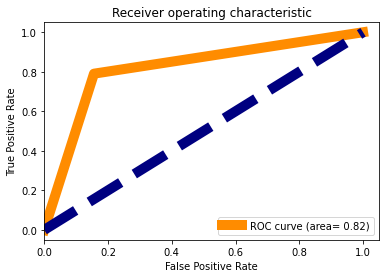

In [138]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(svc_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Saving Best Model

In [139]:
import pickle
filename="Evaluation_Project_Customer_Churn_Analysis.pkl "
pickle.dump(svc, open(filename,'wb'))

In [140]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(svc.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2061,0,0
2062,0,0
2063,1,1
2064,0,0
